In [ ]:
#Random Forest trained with non-linear data, with class_weights and using labels-v4

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import os
import time

In [2]:
# nombre de instancia
# número restricciones
# número variables
# si es lineal o no (true / false)
# porcentaje de restricciones unarias, binarias, porcentaje de ternarias, porcentaje cuaternarias o más 
# porcentaje de terminos unarios, binarios, porcentaje de ternarios, porcentaje cuaternarios o más 
# porcentaje de terminos en la función obj
# porcentaje de terminos positivos/negativos en restricciones
# porcentaje de terminos positivos/negativos en funcion obj
# timestep
# solver (label)

main_path="/global/scratch/users/cpezov/AAPBO/"
d_path=main_path+"datasets-v4/"
feat_path=d_path+"features/"

columns = ["# contraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func","timestep","solver"]
names=[]
num_rest=[]
num_var=[]
linear=[]
r_unary=[]
r_binary=[]
r_ternary=[]
r_cuaternary=[]
t_unary=[]
t_binary=[]
t_ternary=[]
t_cuaternary=[]
t_fo=[]
t_pos_r=[]
t_pos_fo=[]
timestep=[]
solvers=[]

#Recolectar data de txt files
with open(d_path+"txt_files/data_ordered.txt") as f:
    lines = f.readlines()
    for l in lines:
        words=l.split()
        name=words[0][words[0].find("/")+1:]
        print(name)
        with open(feat_path+name) as feat_f:
            l=feat_f.readlines()
            w=l[0].split()
            for n in range(500): #repetir 500 cada instancia, para que cuadre con los timesteps
                names.append(w[0])
                num_rest.append(int(w[1]))
                num_var.append(int(w[2]))
                linear.append(int(w[3]))
                r_unary.append(float(w[4]))
                r_binary.append(float(w[5]))
                r_ternary.append(float(w[6]))
                r_cuaternary.append(float(w[7]))
                t_unary.append(float(w[8]))
                t_binary.append(float(w[9]))
                t_ternary.append(float(w[10]))
                t_cuaternary.append(float(w[11]))
                t_fo.append(float(w[12]))
                t_pos_r.append(float(w[13]))
                t_pos_fo.append(float(w[14]))
                timestep.append(n)
        
with open(main_path+"labels-v4.txt") as f:
    lines = f.readlines()
    for l in lines:
        for word in l.split():
            solvers.append(int(word))

Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-abcdeir.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-combined-EDCBAir.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-combined-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-combined-irEDCBA.opb
Benchmark1/normalized-single-ob

Benchmark10/normalized-single-obj-f46-DC_Side1.seq-A-2-1-irEDCBA.opb
Benchmark10/normalized-single-obj-f46-DC_Side1.seq-B-2-1-irabcde.opb
Benchmark10/normalized-single-obj-f47-DC_Side1.seq-B-2-combined-irabcde.opb
Benchmark10/normalized-single-obj-f47-DC_Side1.seq-B-2-combined-irEDCBA.opb
Benchmark10/normalized-single-obj-f46-DC_Side1.seq-A-2-combined-irEDCBA.opb
Benchmark10/normalized-single-obj-f46-DC_Side1.seq-A-2-combined-irabcde.opb
Benchmark11/normalized-single-obj-f49-DC_TotalLoss.seq-A-2-2-irEDCBA.opb
Benchmark11/normalized-single-obj-f48-DC_TotalLoss.seq-B-2-2-irabcde.opb
Benchmark11/normalized-single-obj-f48-DC_TotalLoss.seq-B-2-2-irEDCBA.opb
Benchmark11/normalized-single-obj-f48-DC_TotalLoss.seq-A-2-2-irabcde.opb
Benchmark11/normalized-single-obj-f48-DC_TotalLoss.seq-B-2-1-irabcde.opb
Benchmark11/normalized-single-obj-f49-DC_TotalLoss.seq-B-2-1-irEDCBA.opb
Benchmark11/normalized-single-obj-f49-DC_TotalLoss.seq-A-2-1-irabcde.opb
Benchmark11/normalized-single-obj-f49-DC_TotalL

Benchmark17/normalized-autocorr_bern50-50.lin.opb
Benchmark17/normalized-autocorr_bern55-41.lin.opb
Benchmark17/normalized-autocorr_bern55-55.lin.opb
Benchmark17/normalized-autocorr_bern60-45.lin.opb
Benchmark17/normalized-autocorr_bern60-60.lin.opb
Benchmark18/normalized-cardqp_inlp.lin.opb
Benchmark19/normalized-crossdock_15x8.lin.opb
Benchmark20/normalized-faclay60.lin.opb
Benchmark20/normalized-faclay70.lin.opb
Benchmark20/normalized-faclay75.lin.opb
Benchmark20/normalized-faclay80.lin.opb
Benchmark21/normalized-graphpart_2g-0044-1601.lin.opb
Benchmark21/normalized-graphpart_2g-0055-0062.lin.opb
Benchmark21/normalized-graphpart_2g-0066-0066.lin.opb
Benchmark21/normalized-graphpart_2g-0077-0077.lin.opb
Benchmark21/normalized-graphpart_2g-0088-0088.lin.opb
Benchmark21/normalized-graphpart_2g-0099-9211.lin.opb
Benchmark21/normalized-graphpart_2g-1010-0824.lin.opb
Benchmark22/normalized-graphpart_3g-0234-0234.lin.opb
Benchmark22/normalized-graphpart_3g-0333-0333.lin.opb
Benchmark22/nor

Benchmark41/normalized-autocorr_bern35-26.lin.opb
Benchmark41/normalized-autocorr_bern40-30.lin.opb
Benchmark42/normalized-crossdock_15x7.lin.opb
Benchmark43/normalized-edgecross10-010.lin.opb
Benchmark43/normalized-edgecross10-020.lin.opb
Benchmark43/normalized-edgecross10-030.lin.opb
Benchmark43/normalized-edgecross14-019.lin.opb
Benchmark43/normalized-edgecross10-040.lin.opb
Benchmark43/normalized-edgecross10-090.lin.opb
Benchmark43/normalized-edgecross10-050.lin.opb
Benchmark43/normalized-edgecross10-070.lin.opb
Benchmark43/normalized-edgecross14-058.lin.opb
Benchmark43/normalized-edgecross20-040.lin.opb
Benchmark43/normalized-edgecross14-176.lin.opb
Benchmark43/normalized-edgecross22-048.lin.opb
Benchmark43/normalized-edgecross14-098.lin.opb
Benchmark43/normalized-edgecross14-117.lin.opb
Benchmark43/normalized-edgecross24-057.lin.opb
Benchmark43/normalized-edgecross20-080.lin.opb
Benchmark43/normalized-edgecross14-137.lin.opb
Benchmark43/normalized-edgecross22-096.lin.opb
Benchmar

Benchmark61/normalized-sporttournament26.opb
Benchmark61/normalized-sporttournament28.opb
Benchmark61/normalized-sporttournament30.opb
Benchmark61/normalized-sporttournament32.opb
Benchmark61/normalized-sporttournament34.opb
Benchmark61/normalized-sporttournament36.opb
Benchmark61/normalized-sporttournament38.opb
Benchmark61/normalized-sporttournament40.opb
Benchmark61/normalized-sporttournament42.opb
Benchmark61/normalized-sporttournament44.opb
Benchmark61/normalized-sporttournament46.opb
Benchmark61/normalized-sporttournament48.opb
Benchmark61/normalized-sporttournament50.opb
Benchmark62/normalized-ped2.G.recomb5-0.01-5.opb
Benchmark62/normalized-ped2.G.recomb10-0.01-5.opb
Benchmark62/normalized-ped2.G.recomb5-0.01-1.opb
Benchmark62/normalized-ped2.G.recomb10-0.01-2.opb
Benchmark62/normalized-ped2.G.recomb1-0.01-2.opb
Benchmark62/normalized-ped2.G.recomb10-0.01-4.opb
Benchmark62/normalized-ped2.G.recomb5-0.01-2.opb
Benchmark62/normalized-ped2.G.recomb5-0.10-7.opb
Benchmark62/normaliz

Benchmark97/normalized-minisat100_16_6_1_ic.opb
Benchmark97/normalized-minisat100_16_6_0_ic.opb
Benchmark97/normalized-minisat100_16_6_6_mh.opb
Benchmark97/normalized-minisat100_16_6_0_mh.opb
Benchmark97/normalized-minisat100_16_6_1_mh.opb
Benchmark97/normalized-minisat100_16_6_3_mh.opb
Benchmark97/normalized-minisat100_16_6_7_mh.opb
Benchmark97/normalized-minisat100_16_6_8_mh.opb
Benchmark97/normalized-minisat100_16_6_4_mh.opb
Benchmark97/normalized-minisat100_16_6_9_mh.opb
Benchmark97/normalized-minisat100_16_6_2_mh.opb
Benchmark97/normalized-minisat100_16_6_5_mh.opb
Benchmark98/normalized-minisat15_4_4_9_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_8_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_6_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_5_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_3_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_1_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_0_mh_ic.opb
Benchmark99/normalized-minisat25_4_7_8_mh_ic.opb
Benchmark99/normalized-minisat25

Benchmark142/normalized-t1722.opb
Benchmark142/normalized-t1717.opb
Benchmark143/normalized-zib01.opb
Benchmark144/normalized-222__neos-1330346.opb
Benchmark145/normalized-acc-tight6.opb
Benchmark145/normalized-acc-tight4.opb
Benchmark146/normalized-ash608gpia-3col.opb
Benchmark147/normalized-bnatt350.opb
Benchmark147/normalized-bnatt400.opb
Benchmark148/normalized-datt256.opb
Benchmark149/normalized-ex1010-pi.opb
Benchmark149/normalized-ex9.opb
Benchmark150/normalized-f2000.opb
Benchmark151/normalized-go19.opb
Benchmark152/normalized-hanoi5.opb
Benchmark153/normalized-iis-bupa-cov.opb
Benchmark153/normalized-iis-pima-cov.opb
Benchmark154/normalized-macrophage.opb
Benchmark155/normalized-methanosarcina.opb
Benchmark156/normalized-mspp16.opb
Benchmark157/normalized-neos788725.opb
Benchmark157/normalized-neos-1440225.opb
Benchmark157/normalized-neos-538867.opb
Benchmark157/normalized-neos-1616732.opb
Benchmark157/normalized-neos-807456.opb
Benchmark157/normalized-neos-785912.opb
Benchmar

Benchmark182/normalized-rand3c03fd.cudf.paranoid.opb
Benchmark182/normalized-randf794d2.cudf.paranoid.opb
Benchmark182/normalized-randc5fe62.cudf.paranoid.opb
Benchmark182/normalized-rand18b530.cudf.paranoid.opb
Benchmark182/normalized-randa2004a.cudf.paranoid.opb
Benchmark182/normalized-randfd04d4.cudf.paranoid.opb
Benchmark182/normalized-rand5d20db.cudf.paranoid.opb
Benchmark182/normalized-rand4b919e.cudf.paranoid.opb
Benchmark182/normalized-rand362510.cudf.paranoid.opb
Benchmark182/normalized-rand0a62b6.cudf.paranoid.opb
Benchmark182/normalized-randc18b26.cudf.paranoid.opb
Benchmark182/normalized-rand71b131.cudf.paranoid.opb
Benchmark183/normalized-1078.cudf.trendy.opb
Benchmark183/normalized-787.cudf.trendy.opb
Benchmark183/normalized-1021.cudf.trendy.opb
Benchmark183/normalized-995.cudf.trendy.opb
Benchmark184/normalized-j3010_4.std.opb
Benchmark184/normalized-j3010_3.std.opb
Benchmark184/normalized-j305_3.std.opb
Benchmark184/normalized-j304_5.std.opb
Benchmark184/normalized-j309

Benchmark196/normalized-50-250-false-45-90-4-10000opt.opb
Benchmark196/normalized-50-250-false-45-90-4-7000opt.opb
Benchmark196/normalized-50-250-false-45-90-4-8000opt.opb
Benchmark196/normalized-50-250-false-45-90-4-1000opt.opb
Benchmark196/normalized-50-250-false-45-90-4-4000opt.opb
Benchmark196/normalized-50-250-false-45-90-4-9000opt.opb
Benchmark196/normalized-50-250-false-45-90-4-5000opt.opb
Benchmark196/normalized-50-250-false-45-90-4-3000opt.opb
Benchmark197/normalized-50-750-false-45-90-4-7000opt.opb
Benchmark197/normalized-50-750-false-45-90-4-8000opt.opb
Benchmark197/normalized-50-750-false-45-90-4-10000opt.opb
Benchmark197/normalized-50-750-false-45-90-4-2000opt.opb
Benchmark197/normalized-50-750-false-45-90-4-6000opt.opb
Benchmark197/normalized-50-750-false-45-90-4-9000opt.opb
Benchmark197/normalized-50-750-false-45-90-4-4000opt.opb
Benchmark197/normalized-50-750-false-45-90-4-3000opt.opb
Benchmark197/normalized-50-750-false-45-90-4-1000opt.opb
Benchmark197/normalized-50-75

Benchmark219/normalized-mds_1000_25_5.opb
Benchmark219/normalized-mds_1000_25_4.opb
Benchmark219/normalized-mds_1000_25_3.opb
Benchmark219/normalized-mds_1000_25_2.opb
Benchmark219/normalized-mds_1000_25_1.opb
Benchmark220/normalized-mis_10_4_1.opb
Benchmark220/normalized-mis_10_4_5.opb
Benchmark220/normalized-mis_10_4_4.opb
Benchmark220/normalized-mis_10_4_3.opb
Benchmark220/normalized-mis_10_4_2.opb
Benchmark221/normalized-mis_50_25_5.opb
Benchmark221/normalized-mis_50_25_4.opb
Benchmark221/normalized-mis_50_25_2.opb
Benchmark221/normalized-mis_50_25_1.opb
Benchmark221/normalized-mis_50_10_5.opb
Benchmark221/normalized-mis_50_10_4.opb
Benchmark221/normalized-mis_50_10_3.opb
Benchmark221/normalized-mis_50_10_2.opb
Benchmark221/normalized-mis_50_10_1.opb
Benchmark221/normalized-mis_50_25_3.opb
Benchmark222/normalized-mis_100_25_5.opb
Benchmark222/normalized-mis_100_25_4.opb
Benchmark222/normalized-mis_100_25_3.opb
Benchmark222/normalized-mis_100_25_2.opb
Benchmark222/normalized-mis_100

Benchmark228/factor-mod-size=7-P0=5-P1=113-P2=107-P3=11-P4=43-P5=101-B.opb
Benchmark228/factor-mod-size=7-P0=11-P1=71-P2=127-P3=19-P4=89-P5=17-B.opb
Benchmark228/factor-mod-size=7-P0=43-P1=107-P2=31-P3=113-P4=127-P5=2-P6=79-B.opb
Benchmark228/factor-mod-size=7-P0=37-P1=47-P2=17-P3=127-P4=31-P5=127-P6=17-B.opb
Benchmark228/factor-mod-size=7-P0=127-P1=59-P2=127-P3=89-P4=17-P5=43-P6=53-B.opb
Benchmark228/factor-mod-size=7-P0=89-P1=37-P2=43-P3=47-P4=41-P5=107-P6=127-B.opb
Benchmark228/factor-mod-size=7-P0=127-P1=47-P2=7-P3=127-P4=17-P5=97-P6=127-B.opb
Benchmark228/factor-mod-size=7-P0=37-P1=67-P2=5-P3=47-P4=73-P5=127-P6=29-P7=127-B.opb
Benchmark228/factor-mod-size=7-P0=71-P1=131-P2=37-P3=29-P4=71-P5=79-P6=47-P7=41-B.opb
Benchmark228/factor-mod-size=7-P0=47-P1=43-P2=53-P3=59-P4=67-P5=71-P6=53-P7=67-B.opb
Benchmark228/factor-mod-size=7-P0=107-P1=13-P2=17-P3=127-P4=13-P5=53-P6=73-P7=59-B.opb
Benchmark228/factor-mod-size=7-P0=59-P1=103-P2=101-P3=43-P4=37-P5=37-P6=17-P7=23-B.opb
Benchmark228/fa

Benchmark231/normalized-mps-v2-20-10-boeing2.opb
Benchmark231/normalized-mps-v2-20-10-recipe.opb
Benchmark231/normalized-mps-v2-20-10-israel.opb
Benchmark231/normalized-mps-v2-20-10-vtp.base.opb
Benchmark231/normalized-mps-v2-20-10-agg.opb
Benchmark231/normalized-mps-v2-20-10-sc205.opb
Benchmark231/normalized-mps-v2-20-10-grow7.opb
Benchmark231/normalized-mps-v2-20-10-lotfi.opb
Benchmark231/normalized-mps-v2-20-10-boeing1.opb
Benchmark231/normalized-mps-v2-20-10-agg2.opb
Benchmark231/normalized-mps-v2-20-10-agg3.opb
Benchmark231/normalized-mps-v2-20-10-scorpion.opb
Benchmark231/normalized-mps-v2-20-10-forplan.opb
Benchmark231/normalized-mps-v2-20-10-sctap1.opb
Benchmark231/normalized-mps-v2-20-10-etamacro.opb
Benchmark231/normalized-mps-v2-20-10-degen2.opb
Benchmark231/normalized-mps-v2-20-10-tuff.opb
Benchmark231/normalized-mps-v2-20-10-grow15.opb
Benchmark231/normalized-mps-v2-20-10-scsd1.opb
Benchmark231/normalized-mps-v2-20-10-seba.opb
Benchmark231/normalized-mps-v2-20-10-grow22.op

Benchmark255/normalized-mps-v2-20-10-blp-ic97.opb
Benchmark255/normalized-mps-v2-20-10-blp-ic98.opb
Benchmark255/normalized-mps-v2-20-10-blp-ar98.opb
Benchmark256/normalized-mps-v2-20-10-CMS750_4.opb
Benchmark257/normalized-mps-v2-20-10-core2586-950.opb
Benchmark257/normalized-mps-v2-20-10-core2536-691.opb
Benchmark257/normalized-mps-v2-20-10-core4284-1064.opb
Benchmark257/normalized-mps-v2-20-10-core4872-1529.opb
Benchmark258/normalized-mps-v2-20-10-dc1c.opb
Benchmark258/normalized-mps-v2-20-10-dc1l.opb
Benchmark259/normalized-mps-v2-20-10-dg012142.opb
Benchmark260/normalized-mps-v2-20-10-dolom1.opb
Benchmark261/normalized-mps-v2-20-10-glass4.opb
Benchmark262/normalized-mps-v2-20-10-NSR8K.opb
Benchmark263/normalized-mps-v2-20-10-nsrand_ipx.opb
Benchmark264/normalized-mps-v2-20-10-railway_8_1_0.opb
Benchmark264/normalized-mps-v2-20-10-rail507.opb
Benchmark265/normalized-mps-v2-20-10-roll3000.opb
Benchmark266/normalized-mps-v2-20-10-siena1.opb
Benchmark267/normalized-mps-v2-20-10-sp98ic

Benchmark324/normalized-mps-v2-20-10-protfold.opb
Benchmark324/normalized-mps-v2-20-10-seymour.opb
Benchmark324/normalized-mps-v2-20-10-manna81.opb
Benchmark324/normalized-mps-v2-20-10-mzzv11.opb
Benchmark324/normalized-mps-v2-20-10-mzzv42z.opb
Benchmark324/normalized-mps-v2-20-10-fast0507.opb
Benchmark324/normalized-mps-v2-20-10-net12.opb
Benchmark325/normalized-mps-v2-20-10-neos5.opb
Benchmark325/normalized-mps-v2-20-10-neos16.opb
Benchmark325/normalized-mps-v2-20-10-neos1.opb
Benchmark325/normalized-mps-v2-20-10-neos18.opb
Benchmark325/normalized-mps-v2-20-10-neos8.opb
Benchmark325/normalized-mps-v2-20-10-neos10.opb
Benchmark325/normalized-mps-v2-20-10-neos19.opb
Benchmark326/normalized-reduced-mps-v2-20-10-afiro.opb
Benchmark326/normalized-reduced-mps-v2-20-10-kb2.opb
Benchmark326/normalized-reduced-mps-v2-20-10-sc50b.opb
Benchmark326/normalized-reduced-mps-v2-20-10-sc50a.opb
Benchmark326/normalized-reduced-mps-v2-20-10-share2b.opb
Benchmark326/normalized-reduced-mps-v2-20-10-blend

Benchmark336/normalized-reduced-mps-v2-20-10-neos13.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos6.opb
Benchmark336/normalized-reduced-mps-v2-20-10-mkc1.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos2.opb
Benchmark336/normalized-reduced-mps-v2-20-10-nug08.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos7.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos3.opb
Benchmark336/normalized-reduced-mps-v2-20-10-swath3.opb
Benchmark336/normalized-reduced-mps-v2-20-10-swath2.opb
Benchmark336/normalized-reduced-mps-v2-20-10-swath1.opb
Benchmark336/normalized-reduced-mps-v2-20-10-qap10.opb
Benchmark336/normalized-reduced-mps-v2-20-10-dano3_5.opb
Benchmark336/normalized-reduced-mps-v2-20-10-dano3_4.opb
Benchmark336/normalized-reduced-mps-v2-20-10-dano3_3.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos9.opb
Benchmark337/normalized-reduced-mps-v2-20-10-glass4.opb
Benchmark337/normalized-reduced-mps-v2-20-10-nsrand_ipx.opb
Benchmark337/normalized-reduced-mps-v2-20-10-blp-i

Benchmark354/normalized-data8_3.opb
Benchmark354/normalized-data10_3.opb
Benchmark355/normalized-g2x2.opb
Benchmark355/normalized-g4x4.opb
Benchmark355/normalized-g9x3.opb
Benchmark355/normalized-g7x7.opb
Benchmark355/normalized-g9x9.opb
Benchmark355/normalized-g15x15.opb
Benchmark355/normalized-g100x100.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_12.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_19.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_14.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_18.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_22.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_10.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_20.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_11.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_15.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_24.opb.PB06.opb
Benchmark356/normali

Benchmark373/normalized-opt-market-split_8_70_3.opb
Benchmark373/normalized-opt-market-split_8_70_4.opb
Benchmark373/normalized-opt-market-split_8_70_1.opb
Benchmark373/normalized-opt-market-split_8_70_2.opb
Benchmark374/normalized-factor-size=9-P=167-Q=347.opb
Benchmark374/normalized-factor-size=9-P=307-Q=317.opb
Benchmark374/normalized-factor-size=9-P=97-Q=479.opb
Benchmark374/normalized-factor-size=9-P=97-Q=457.opb
Benchmark374/normalized-factor-size=9-P=97-Q=331.opb
Benchmark374/normalized-factor-size=9-P=307-Q=331.opb
Benchmark374/normalized-factor-size=9-P=89-Q=431.opb
Benchmark374/normalized-factor-size=9-P=89-Q=347.opb
Benchmark374/normalized-factor-size=9-P=307-Q=347.opb
Benchmark374/normalized-factor-size=9-P=307-Q=367.opb
Benchmark374/normalized-factor-size=9-P=89-Q=263.opb
Benchmark374/normalized-factor-size=9-P=89-Q=211.opb
Benchmark374/normalized-factor-size=9-P=83-Q=89.opb
Benchmark374/normalized-factor-size=9-P=307-Q=431.opb
Benchmark374/normalized-factor-size=9-P=83-Q=

Benchmark374/normalized-factor-size=9-P=293-Q=307.opb
Benchmark375/normalized-frb30-15-5.opb
Benchmark375/normalized-frb30-15-3.opb
Benchmark375/normalized-frb30-15-1.opb
Benchmark375/normalized-frb30-15-4.opb
Benchmark375/normalized-frb30-15-2.opb
Benchmark376/normalized-frb35-17-4.opb
Benchmark376/normalized-frb35-17-2.opb
Benchmark376/normalized-frb35-17-1.opb
Benchmark376/normalized-frb35-17-3.opb
Benchmark376/normalized-frb35-17-5.opb
Benchmark377/normalized-frb40-19-3.opb
Benchmark377/normalized-frb40-19-2.opb
Benchmark377/normalized-frb40-19-1.opb
Benchmark377/normalized-frb40-19-4.opb
Benchmark377/normalized-frb40-19-5.opb
Benchmark378/normalized-frb45-21-3.opb
Benchmark378/normalized-frb45-21-4.opb
Benchmark378/normalized-frb45-21-5.opb
Benchmark378/normalized-frb45-21-2.opb
Benchmark378/normalized-frb45-21-1.opb
Benchmark379/normalized-frb50-23-5.opb
Benchmark379/normalized-frb50-23-1.opb
Benchmark379/normalized-frb50-23-4.opb
Benchmark379/normalized-frb50-23-2.opb
Benchmark3

In [3]:
#Crear dataframe
# dataframe with no names, so that it doesn't convert everything to str 
data=np.array([num_rest,num_var,linear,r_unary,r_binary,r_ternary,r_cuaternary,t_unary,t_binary,t_ternary,t_cuaternary,t_fo,t_pos_r,t_pos_fo,timestep,solvers])
df = pd.DataFrame(data.T, columns=columns)

#print(df.head())

In [4]:
x=df[["# contraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func","timestep"]]
y=df[['solver']]

#agrupar diferentes timestpes de cada instancia en un mismo set
random.seed(9) #same seed to generate same random numbers as other models
train_indx=[]
inst_train=[]
test_indx=[]
for i in range(0,3128): # v4
    r = random.randint(0,2)
    if(r==2):
        for j in range(0,500):
            test_indx.append(500*i+j)
    else:
        inst_train.append(i)
        for j in range(0,500):
            train_indx.append(500*i+j)

x_train=x.iloc[train_indx]
x_test=x.iloc[test_indx]
y_train=y.iloc[train_indx]
y_test=y.iloc[test_indx]
y_train_og=y.iloc[train_indx]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1027000, 15)
(537000, 15)
(1027000, 1)
(537000, 1)


In [5]:
#class-weight

#nosol(0), clasp(1), naps(2), openwbo1(3), openwbo4(4), gurobi(5), lspbo(6), roundingsat(7)

#cw = {0:2.0,1:2.0,2:2.0,3:2.0,4:2.0,5:1.0,6:2.0,7:2.0} #uniform
cw = {0:4.0,1:4.0,2:4.0,3:4.0,4:4.0,5:1.0,6:4.0,7:3.0} #best so far

In [6]:
rf_model = RandomForestClassifier(n_estimators=100, max_features="sqrt", criterion="gini",random_state=3, class_weight=cw)
rf_model.fit(np.nan_to_num(x_train.astype(np.float32)), y_train.values.ravel())

RandomForestClassifier(bootstrap=True,
                       class_weight={0: 4.0, 1: 4.0, 2: 4.0, 3: 4.0, 4: 4.0,
                                     5: 1.0, 6: 4.0, 7: 3.0},
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=3, verbose=0, warm_start=False)

In [7]:
y_pred = rf_model.predict(np.nan_to_num(x_test.astype(np.float32)))

In [8]:
print("Accuracy",metrics.accuracy_score(y_test.values.ravel(), y_pred))
pred = rf_model.predict_proba(np.nan_to_num(x_test.astype(np.float32)))
print("Loss",metrics.log_loss(y_test.values.ravel(), pred))

Accuracy 0.7104934823091248
Loss 4.3859208446453914


In [9]:
#Save
l=int(len(y_test)/500)
y_test_np=y_test.to_numpy().reshape(l,500)
f = open(main_path+"models/v4/randomForest_nonlinear-v4-weights/results/y_test.txt", "w")
np.savetxt(f,y_test_np.reshape(y_test_np.shape[0], -1),fmt="%s")
f.close()

l=int(len(y_pred)/500)
y_pred_np=y_pred.reshape(l,500)
f = open(main_path+"models/v4/randomForest_nonlinear-v4-weights/results/y_preds.txt", "w")
np.savetxt(f,y_pred_np.reshape(y_pred_np.shape[0],-1),fmt='%s')
f.close()

#print(y_train_np.shape)
#print(y_pred_np)

In [10]:
l=int(len(y_train)/500)
y_train_np=y_train.to_numpy().reshape(l,500)
f = open(main_path+"models/v4/randomForest_nonlinear-v4-weights/results/y_train.txt", "w")
np.savetxt(f,y_train_np.reshape(y_train_np.shape[0], -1),fmt="%s")
f.close()

l=int(len(y_train_og)/500)
y_train_og_np=y_train_og.to_numpy().reshape(l,500)
f = open(main_path+"models/v4/randomForest_nonlinear-v4-weights/results/y_train_og.txt", "w")
np.savetxt(f,y_train_og_np.reshape(y_train_og_np.shape[0], -1),fmt="%s")
f.close()

In [11]:
#Feature importances
importances = rf_model.feature_importances_
feats = x.columns

f=open(main_path+"models/v4/randomForest_nonlinear-v4-weights/results/features_and_acc.txt", "w")

i=0
while i < len(feats):
    print("Importance of feature "+feats[i]+" is "+str(importances[i]))
    f.write("Importance of feature "+feats[i]+" is "+str(importances[i]))
    i = i+1

print(metrics.accuracy_score(y_test.values.ravel(), y_pred))
f.write("Testing accuracy: "+str(metrics.accuracy_score(y_test.values.ravel(), y_pred)))

f.close()

Importance of feature # contraints is 0.10018629978466138
Importance of feature # variables is 0.08943284709454724
Importance of feature linearity is 0.009877338621701062
Importance of feature % 1 term constr is 0.051887348373326245
Importance of feature % 2 terms constr is 0.057828217806830624
Importance of feature % 3 terms constr is 0.06665512036557304
Importance of feature % 4+ terms constr is 0.08116163481554031
Importance of feature % degree 1 terms is 0.11068976236162817
Importance of feature % degree 2 terms is 0.03217528295129851
Importance of feature % degree 3 terms is 0.0010616184517296288
Importance of feature % degree 4+ terms is 0.001225052839255333
Importance of feature # terms in obj func is 0.11290763567984526
Importance of feature % positive in constr is 0.09903400990823016
Importance of feature % positive in obj func is 0.0455829591376677
Importance of feature timestep is 0.14029487180816536
0.7104934823091248


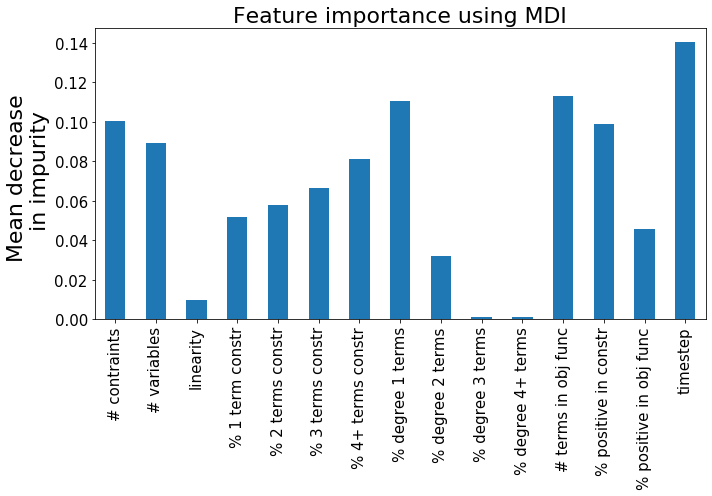

In [13]:
#Grafico feature importances
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feats)

fsize = 22

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax, figsize = (10,7), fontsize=fsize-7)
forest_importances.plot.bar(ax=ax, figsize = (10,7), fontsize=fsize-7)
plt.xticks(rotation=90, fontsize=fsize-7)
ax.set_title("Feature importance using MDI", fontsize=fsize)
ax.set_ylabel("Mean decrease \n in impurity", fontsize=fsize)
fig.tight_layout()

#print(importances)

https://data36.com/random-forest-in-python/


# Prediction Time

In [9]:
#Calcular tiempos de predicción por cada par instancia-tiempo de test
#(Correr esto se demora 1 hora aprox)

l=int(len(y_pred)/500)
t_preds=np.empty(l*500)
i=0

#prediccion
for idx in test_indx:
    #crear dataframe de solo esa instancia-timestep
    x_i = x.iloc[[idx]]
    
    #hacer predicción y medir tiempo
    start=time.time()
    y_i = rf_model.predict(np.nan_to_num(x_i.astype(np.float32)))
    tiempo=time.time()-start
    t_preds[i]=tiempo
    
    i=i+1

In [10]:
#Guardar tiempos de prediccion

print(t_preds)
f = open(main_path+"models/results-v4/pred_times/t_pred_randomForest_nonlinear-v4-weights.txt", "w")
np.savetxt(f, t_preds, delimiter=" ", fmt="%s")
f.close()

[0.04978728 0.00955486 0.00780487 ... 0.00653648 0.00659013 0.00654626]
